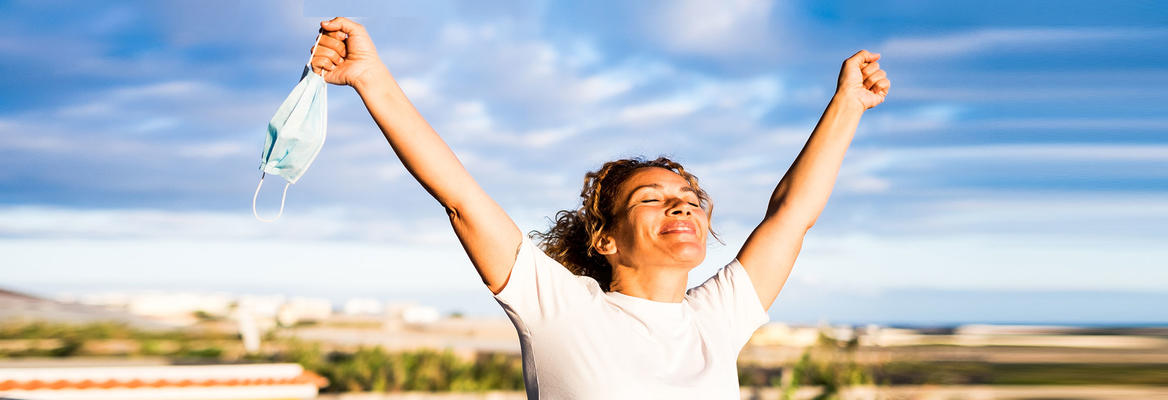


# HAS COVID-19 AFFECTED THE WORLD’S HAPPINESS AND WELLBEING?

## by Amy Reidy - 7th May, 2021

### Introduction
In 2020, the world was hit with the worst pandemic in over a century, and since then governments everywhere have introduced COVID-19 policies, such as social distancing requirements, lockdowns, and travel restrictions, to curb the spread of the virus within and between countries. And in the past 14 months, people across the globe have dealt with a myriad of challenges, including job losses, economic hardships, social isolation, threats to the health of themselves and their loved ones, and of course grieving the loss of over 3 million lives from the virus. 


Circumstances like these can cause stress, loneliness, and anxiety, and they may take a major toll on people’s mental health and wellbeing. This project will explore if people’s life satisfaction and emotions have significantly changed from 2019 to 2020. Using data from the World Happiness Report 2021, this study will test 3 hypotheses:

 1.	Global happiness scores decreased from 2019 to 2020. 
 2.	Positive emotions decreased globally from 2019 to 2020. 
 3.	Negative emotions increased globally from 2019 to 2020.

### Literature Review
The World Happiness Report (WHR) has been ranking countries by happiness scores every year since 2012. The global ranking scores are usually based on each country’s averages from the previous 3 years, and data is collected from over 155 countries through in-person or telephone surveys. However, in 2020 surveys were only carried out with citizens of 95 countries due to the pandemic. And WHR had to use the averages of 2018-2019 results for the missing countries to obtain scores for all countries. 

This year’s report focuses on how COVID-19 has affected levels of happiness and wellbeing around the world, and it discusses how people’s lives have been impacted by the pandemic. The researchers also directly compared survey results from 2020 to the average results from 2017-2019 and found that emotions were more affected by COVID-19 than general life satisfaction. 

Other studies around the world have also tried to measure what effects the pandemic is having on people’s wellbeing and mental health. One such study in Germany found that life satisfaction, positive affect, and negative affect (the same variables which will be used in this project) did not change significantly from December 2019 to March 2020, but life satisfaction and positive affect decreased, and negative affect increased from March to May 2020 (Zacher and Rudolph, 2021). The study also showed that positive affect was positively correlated with factors such as controllable-by-self appraisals and emotional support, whereas negative affect increased with self-blame, substance abuse and threat appraisals. 

While the previous study and the WHR used data collected using traditional methods of surveying, other studies have used real-time Big Data to try to measure levels of well-being in 2020. For example, Greyling et al. (2020) explored the impact of lockdowns on the happiness of residents in Australia, New Zealand and South Africa using the Gross Happiness National Index which is derived from Twitter. They discovered that lockdowns have a negative effect on people’s happiness, with more stringent stay-at-home measures having more of a detrimental effect.

Another team of researchers used Twitter-generated datasets to examine emotions over the early days of the pandemic and analyzed over 20 million tweets across 170 countries (Lwin et al., 2020). They discovered that positive and negative emotions evolved from January 2020 to May 2020. Initially, there were strong sentiments of fear in January and February, but these feelings gradually decreased as the pandemic developed. Feelings of anger increased from the start of the year and peaked the day after WHO declared COVID-19 a pandemic. But feelings of joy also increased around the world, and gradually there was a greater frequency of words such as “Thank,” “good news,” and “feel good”. 
Another study used Google trends to compare pre- and post-lockdown Google searches related to wellbeing topics, and it determined that there was an increase in searches for boredom, loneliness, worry and sadness; however, searches for divorce, suicide and stress decreased. 

These studies suggests that the pandemic may be having a damaging effect on people’s wellbeing, but this effect may vary over time and across countries. 
 


### Description of Data 
The dataset used for this study was sourced from the World Happiness Report 2021 . The data was collected through surveys by the World Gallup Poll.
Country scores for happiness/life satisfaction, positive emotions, and negative emotions for 2019 and 2020 were extracted from the file to create a new dataset. 
Below is an explanation of each of the variables:

**Happiness Scores**\
The happiness score for each country is based on life evaluations where respondents are asked to evaluate their current life using the image of a ladder, with the best possible life for them as a '10' and the worst possible as a '0'. Each respondent provides a numerical response on this scale, referred to as the Cantril ladder. 

**Positive Affect**\
Participants in the Gallup World Poll are also asked two questions in relation to positive emotions: “Did you smile or laugh a lot yesterday?” and “Did you experience enjoyment during a lot of yesterday?” Answers to each question are coded 0 for ‘No’ and 1 for ‘Yes’, and the average response for each person is calculated. 

**Negative Affect**\
Negative emotions are measured by asking participants if they experienced anger, sadness or worry during a lot of yesterday. Again, answers are coded as 0 for ‘No’, or 1 for ‘Yes’, and averages are calculated for each respondent.


### Data Preprocessing

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import wilcoxon
import seaborn as sns
sns.set_palette("bright")

%matplotlib inline

In [2]:
df = pd.read_csv('Happiness_Data.csv') #reading in the csv file
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [3]:
df['Country name'].unique() # checking if any countries go by multiple names 

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

In [4]:
len(df['Country name'].unique()) # checking how many countries in total in dataset

166

In [5]:
df1 = df[['Country name', 'year', 'Life Ladder', 'Positive affect', 'Negative affect']].copy() #taking just the columns we need
df1

,Country name,year,Life Ladder,Positive affect,Negative affect
0,Afghanistan,2008,3.724,0.518,0.258
1,Afghanistan,2009,4.402,0.584,0.237
2,Afghanistan,2010,4.758,0.618,0.275
3,Afghanistan,2011,3.832,0.611,0.267
4,Afghanistan,2012,3.783,0.710,0.268
...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,0.738,0.209
1945,Zimbabwe,2017,3.638,0.806,0.224
1946,Zimbabwe,2018,3.616,0.710,0.212
1947,Zimbabwe,2019,2.694,0.716,0.235


In [6]:
df2020 = df1[df1['year'] == 2020] # getting the 2020 scores
df2020.describe()

,year,Life Ladder,Positive affect,Negative affect
count,95.0,95.000000,94.000000,94.000000
mean,2020.0,5.840600,0.720426,0.292234
std,0.0,0.978608,0.084521,0.079890
min,2020.0,3.160000,0.384000,0.083000
25%,2020.0,5.204500,0.651000,0.240750
50%,2020.0,5.885000,0.734500,0.291000
75%,2020.0,6.495000,0.788500,0.340000
max,2020.0,7.889000,0.878000,0.532000


In [7]:
df2020.columns = ['Country', 'Year', 'Happiness_2020', 'Positive_Affect_2020', 'Negative_Affect_2020']
df2020.drop(['Year'], axis=1, inplace=True)
df2020

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,Happiness_2020,Positive_Affect_2020,Negative_Affect_2020
24,Albania,5.365,0.679,0.265
51,Argentina,5.901,0.764,0.342
79,Australia,7.137,0.769,0.205
92,Austria,7.213,0.769,0.206
117,Bahrain,6.173,0.790,0.297
...,...,...,...,...
1850,United States,7.028,0.787,0.295
1865,Uruguay,6.310,0.807,0.265
1893,Venezuela,4.574,0.722,0.396
1933,Zambia,4.838,0.691,0.345


In [8]:
df2020.count()

Country                 95
Happiness_2020          95
Positive_Affect_2020    94
Negative_Affect_2020    94
dtype: int64

In [9]:
countries = list(df2020['Country']) #checking which countries we have 2020 data for
print(countries)

['Albania', 'Argentina', 'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lithuania', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Namibia', 'Netherlands', 'New Zealand', 'Nigeria', 'North Macedonia', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Russia', 'Saudi Arabia', 'Serbia', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan Province of China', 'Tajikistan

In [10]:
df2019 = df1[df1['year'] == 2019]
df2019 = df2019[df2019['Country name'].isin(countries)] #getting only the countries that are in the 2020 dataset
df2019.columns = ['Country', 'Year', 'Happiness_2019', 'Positive_Affect_2019', 'Negative_Affect_2019']
df2019.drop(['Year'], axis=1, inplace=True)
df2019

,Country,Happiness_2019,Positive_Affect_2019,Negative_Affect_2019
23,Albania,4.995,0.681,0.274
50,Argentina,6.086,0.826,0.319
78,Australia,7.234,0.770,0.202
91,Austria,7.195,0.774,0.205
116,Bahrain,7.098,0.762,0.317
...,...,...,...,...
1849,United States,6.944,0.815,0.244
1864,Uruguay,6.600,0.889,0.222
1892,Venezuela,5.081,0.761,0.351
1932,Zambia,3.307,0.743,0.394


In [11]:
df2019.count()

Country                 93
Happiness_2019          93
Positive_Affect_2019    92
Negative_Affect_2019    92
dtype: int64

There are only 93 countries for which we have 2019 and 2020 happiness scores, and 92 countries for which we have positive and negative affect scores. The 2020 data frame needs to be reduced to only contain countries for which we also have 2019 data. 

In [12]:
newcountries = list(df2019['Country'])

In [13]:
not_in_2019 = df2020[~df2020['Country'].isin(newcountries)]
not_in_2019

,Country,Happiness_2020,Positive_Affect_2020,Negative_Affect_2020
448,Czech Republic,6.897,0.832,0.290
785,Iraq,4.785,0.644,0.532


We can see that we have 2020 data for Czech Republic and Iraq, but they are missing from the 2019 data frame. 

In [14]:
df2020 = df2020[df2020['Country'].isin(newcountries)]
df2020.count()

Country                 93
Happiness_2020          93
Positive_Affect_2020    92
Negative_Affect_2020    92
dtype: int64

We now have the same number of observations in each data frame and we can merge them together. 

In [15]:
df = pd.merge(df2019, df2020)
df = df[['Country','Happiness_2019', 'Happiness_2020', 'Positive_Affect_2019', 'Positive_Affect_2020', 'Negative_Affect_2019', 'Negative_Affect_2020']]
df.describe()

,Happiness_2019,Happiness_2020,Positive_Affect_2019,Positive_Affect_2020,Negative_Affect_2019,Negative_Affect_2020
count,93.000000,93.000000,92.000000,92.000000,92.000000,92.000000
mean,5.848720,5.840591,0.723076,0.720043,0.268489,0.289652
std,1.076551,0.976857,0.098718,0.084259,0.080553,0.076708
min,2.694000,3.160000,0.422000,0.384000,0.093000,0.083000
25%,5.035000,5.241000,0.662000,0.657000,0.206500,0.237750
50%,6.000000,5.885000,0.743000,0.734500,0.252000,0.290500
75%,6.561000,6.488000,0.801750,0.787500,0.319750,0.340000
max,7.780000,7.889000,0.891000,0.878000,0.466000,0.470000


Finally we will create new columns to contain the differences between the years for each variable and country. 

In [16]:
df['Happiness_Difference'] = df['Happiness_2020'] - df['Happiness_2019']
df['Positive_Affect_Difference'] = df['Positive_Affect_2020'] - df['Positive_Affect_2019']
df['Negative_Affect_Difference'] = df['Negative_Affect_2020'] - df['Negative_Affect_2019']
df.describe()

,Happiness_2019,Happiness_2020,Positive_Affect_2019,Positive_Affect_2020,Negative_Affect_2019,Negative_Affect_2020,Happiness_Difference,Positive_Affect_Difference,Negative_Affect_Difference
count,93.000000,93.000000,92.000000,92.000000,92.000000,92.000000,93.000000,92.000000,92.000000
mean,5.848720,5.840591,0.723076,0.720043,0.268489,0.289652,-0.008129,-0.003033,0.021163
std,1.076551,0.976857,0.098718,0.084259,0.080553,0.076708,0.423688,0.051542,0.056235
min,2.694000,3.160000,0.422000,0.384000,0.093000,0.083000,-1.188000,-0.106000,-0.154000
25%,5.035000,5.241000,0.662000,0.657000,0.206500,0.237750,-0.203000,-0.040250,-0.008250
50%,6.000000,5.885000,0.743000,0.734500,0.252000,0.290500,-0.003000,-0.002500,0.020500
75%,6.561000,6.488000,0.801750,0.787500,0.319750,0.340000,0.210000,0.027250,0.051250
max,7.780000,7.889000,0.891000,0.878000,0.466000,0.470000,1.531000,0.192000,0.166000


In [17]:
df.columns

Index(['Country', 'Happiness_2019', 'Happiness_2020', 'Positive_Affect_2019',
       'Positive_Affect_2020', 'Negative_Affect_2019', 'Negative_Affect_2020',
       'Happiness_Difference', 'Positive_Affect_Difference',
       'Negative_Affect_Difference'],
      dtype='object')

In [18]:
df = df[['Country', 'Happiness_2019', 'Happiness_2020', 'Happiness_Difference', 'Positive_Affect_2019',
       'Positive_Affect_2020', 'Positive_Affect_Difference', 'Negative_Affect_2019', 'Negative_Affect_2020',
       'Negative_Affect_Difference']] #rearranging columns
df.head()

,Country,Happiness_2019,Happiness_2020,Happiness_Difference,Positive_Affect_2019,Positive_Affect_2020,Positive_Affect_Difference,Negative_Affect_2019,Negative_Affect_2020,Negative_Affect_Difference
0,Albania,4.995,5.365,0.370,0.681,0.679,-0.002,0.274,0.265,-0.009
1,Argentina,6.086,5.901,-0.185,0.826,0.764,-0.062,0.319,0.342,0.023
2,Australia,7.234,7.137,-0.097,0.770,0.769,-0.001,0.202,0.205,0.003
3,Austria,7.195,7.213,0.018,0.774,0.769,-0.005,0.205,0.206,0.001
4,Bahrain,7.098,6.173,-0.925,0.762,0.790,0.028,0.317,0.297,-0.020


In [19]:
df.to_csv(r'WHR_2019vs2020.csv')

In [20]:
df.isnull().sum()

Country                       0
Happiness_2019                0
Happiness_2020                0
Happiness_Difference          0
Positive_Affect_2019          1
Positive_Affect_2020          1
Positive_Affect_Difference    1
Negative_Affect_2019          1
Negative_Affect_2020          1
Negative_Affect_Difference    1
dtype: int64

In [21]:
df[df.isna().any(axis=1)]

,Country,Happiness_2019,Happiness_2020,Happiness_Difference,Positive_Affect_2019,Positive_Affect_2020,Positive_Affect_Difference,Negative_Affect_2019,Negative_Affect_2020,Negative_Affect_Difference
43,Jordan,4.453,4.094,-0.359,NaN,NaN,NaN,NaN,NaN,NaN


There aren't any positive or negative affect scores for Jordan, so we will drop this row to create a new dataframe which we will use to analysis the positive and negative affect scores.

In [22]:
df1 = df.dropna(axis=0)
df1.describe()

,Happiness_2019,Happiness_2020,Happiness_Difference,Positive_Affect_2019,Positive_Affect_2020,Positive_Affect_Difference,Negative_Affect_2019,Negative_Affect_2020,Negative_Affect_Difference
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,5.863891,5.859576,-0.004315,0.723076,0.720043,-0.003033,0.268489,0.289652,0.021163
std,1.072407,0.964805,0.424402,0.098718,0.084259,0.051542,0.080553,0.076708,0.056235
min,2.694000,3.160000,-1.188000,0.422000,0.384000,-0.106000,0.093000,0.083000,-0.154000
25%,5.051500,5.253000,-0.200000,0.662000,0.657000,-0.040250,0.206500,0.237750,-0.008250
50%,6.002000,5.893000,-0.002000,0.743000,0.734500,-0.002500,0.252000,0.290500,0.020500
75%,6.570750,6.491500,0.211000,0.801750,0.787500,0.027250,0.319750,0.340000,0.051250
max,7.780000,7.889000,1.531000,0.891000,0.878000,0.192000,0.466000,0.470000,0.166000


### Exploratory Data Analysis

First let's look at the statistical summaries, the mean and the confidence intervals for each variable and year.

In [23]:
df[['Happiness_2019', 'Happiness_2020', 'Happiness_Difference']].describe()

,Happiness_2019,Happiness_2020,Happiness_Difference
count,93.000000,93.000000,93.000000
mean,5.848720,5.840591,-0.008129
std,1.076551,0.976857,0.423688
min,2.694000,3.160000,-1.188000
25%,5.035000,5.241000,-0.203000
50%,6.000000,5.885000,-0.003000
75%,6.561000,6.488000,0.210000
max,7.780000,7.889000,1.531000


In [24]:
hapavg19 = df['Happiness_2019'].mean()
hapCI_19 = st.norm.interval(alpha=0.95, loc=np.mean(df['Happiness_2019']), scale=st.sem(df['Happiness_2019']))

print(f"The mean happiness score for the 2019 sample is {round(hapavg19, 3)} CI 95% [{round(hapCI_19[0], 3)} - {round(hapCI_19[1], 3)}]")

The mean happiness score for the 2019 sample is 5.849 CI 95% [5.63 - 6.068]


In [25]:
hapavg20 = df['Happiness_2020'].mean()
hapCI_20 = st.norm.interval(alpha=0.95, loc=np.mean(df['Happiness_2020']), scale=st.sem(df['Happiness_2020']))

print(f"The mean happiness score for the 2020 sample is {round(hapavg20, 3)} CI 95% [{round(hapCI_20[0], 3)} - {round(hapCI_20[1], 3)}]")

The mean happiness score for the 2020 sample is 5.841 CI 95% [5.642 - 6.039]


We can see that mean happiness score for 2019 was 5.849 and in 2020 it was slightly decreased to 5.841. Later we will check if this difference is significant. 

In [26]:
df1[['Positive_Affect_2019', 'Positive_Affect_2020', 'Positive_Affect_Difference']].describe()

,Positive_Affect_2019,Positive_Affect_2020,Positive_Affect_Difference
count,92.000000,92.000000,92.000000
mean,0.723076,0.720043,-0.003033
std,0.098718,0.084259,0.051542
min,0.422000,0.384000,-0.106000
25%,0.662000,0.657000,-0.040250
50%,0.743000,0.734500,-0.002500
75%,0.801750,0.787500,0.027250
max,0.891000,0.878000,0.192000


In [27]:
posavg19 = df1['Positive_Affect_2019'].mean()
posCI_19 = st.norm.interval(alpha=0.95, loc=np.mean(df1['Positive_Affect_2019']), scale=st.sem(df1['Positive_Affect_2019']))

print(f"The mean positive affect score for the 2019 sample is {round(posavg19, 3)} CI 95% [{round(posCI_19[0], 3)} - {round(posCI_19[1], 3)}]")

The mean positive affect score for the 2019 sample is 0.723 CI 95% [0.703 - 0.743]


In [28]:
posavg20 = df1['Positive_Affect_2020'].mean()
posCI_20 = st.norm.interval(alpha=0.95, loc=np.mean(df1['Positive_Affect_2020']), scale=st.sem(df1['Positive_Affect_2020']))

print(f"The mean positive affect score for the 2020 sample is {round(posavg20, 3)} CI 95% [{round(posCI_20[0], 3)} - {round(posCI_20[1], 3)}]")

The mean positive affect score for the 2020 sample is 0.72 CI 95% [0.703 - 0.737]


There is even less of a difference between the mean positive affect scores for 2019 and 2020.

In [29]:
df1[['Negative_Affect_2019', 'Negative_Affect_2020', 'Negative_Affect_Difference']].describe()

,Negative_Affect_2019,Negative_Affect_2020,Negative_Affect_Difference
count,92.000000,92.000000,92.000000
mean,0.268489,0.289652,0.021163
std,0.080553,0.076708,0.056235
min,0.093000,0.083000,-0.154000
25%,0.206500,0.237750,-0.008250
50%,0.252000,0.290500,0.020500
75%,0.319750,0.340000,0.051250
max,0.466000,0.470000,0.166000


In [30]:
negavg19 = df1['Negative_Affect_2019'].mean()
negCI_19 = st.norm.interval(alpha=0.95, loc=np.mean(df1['Negative_Affect_2019']), scale=st.sem(df1['Negative_Affect_2019']))

print(f"The mean negative affect score for the 2019 sample is {round(negavg19, 3)} CI 95% [{round(negCI_19[0], 3)} - {round(negCI_19[1], 3)}]")

The mean negative affect score for the 2019 sample is 0.268 CI 95% [0.252 - 0.285]


In [31]:
negavg20 = df1['Negative_Affect_2020'].mean()
negCI_20 = st.norm.interval(alpha=0.95, loc=np.mean(df1['Negative_Affect_2020']), scale=st.sem(df1['Negative_Affect_2020']))

print(f"The mean negative affect score for the 2020 sample is {round(negavg20, 3)} CI 95% [{round(negCI_20[0], 3)} - {round(negCI_20[1], 3)}]")

The mean negative affect score for the 2020 sample is 0.29 CI 95% [0.274 - 0.305]


For negative affect scores, we see that the mean for the 2020 sample is slightly higher than the 2019 sample. 

### Test Assumptions

Next we will decide on how to compare the samples for each year to check if any of these differences in means are significant. The most popular test to compare paired samples is the **dependent paired T-test**. This is the criteria for using this test:

1.	**The dependent variable must be continuous (interval/ratio).** 
2.	**The observations are independent of one another.** 
3.	**Differences between the two dependent variables should not have outliers.** 
4.	**Differences between the two dependent variables follow an approximately normal distribution.** 

Let's now look at each of these assumptions to check if this would be an appropriate test for our hypothesis testing. 

1.	**The dependent variable must be continuous (interval/ratio).** \
Each variable is a continuous and ratio variable. The happiness score is measured on a scale of 0 to 10, and positive and negative affect are measured from 0 to 1. 


2.	**The observations are independent of one another.** \
The observations are independent as each country is only in a year sample once. 


3.	**Differences between the two dependent variables should not have outliers.** \
We can use boxplots to visually explore if the differences between the paired samples for each dependent variable have any outliers. 


Let's start by looking at the differences in happiness scores.

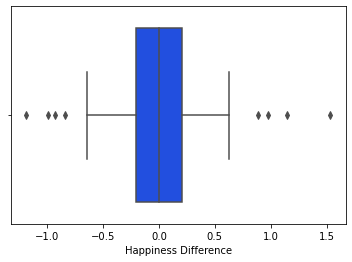

In [32]:
sns.boxplot(x=df['Happiness_Difference'])
plt.xlabel('Happiness Difference')
plt.savefig('Happiness_Difference_Box.png', bbox_inches = 'tight')


In [33]:
df= df.sort_values(by=['Happiness_Difference'], ascending=False)
df

,Country,Happiness_2019,Happiness_2020,Happiness_Difference,Positive_Affect_2019,Positive_Affect_2020,Positive_Affect_Difference,Negative_Affect_2019,Negative_Affect_2020,Negative_Affect_Difference
91,Zambia,3.307,4.838,1.531,0.743,0.691,-0.052,0.394,0.345,-0.049
62,Nigeria,4.356,5.503,1.147,0.715,0.744,0.029,0.245,0.316,0.071
36,India,3.249,4.225,0.976,0.648,0.752,0.104,0.466,0.383,-0.083
18,Croatia,5.626,6.508,0.882,0.551,0.743,0.192,0.269,0.286,0.017
16,China,5.144,5.771,0.627,0.891,0.789,-0.102,0.147,0.245,0.098
...,...,...,...,...,...,...,...,...,...,...
17,Colombia,6.350,5.709,-0.641,0.822,0.795,-0.027,0.322,0.340,0.018
21,Dominican Republic,6.004,5.168,-0.836,0.784,0.734,-0.050,0.264,0.314,0.050
4,Bahrain,7.098,6.173,-0.925,0.762,0.790,0.028,0.317,0.297,-0.020
24,El Salvador,6.455,5.462,-0.993,0.871,0.839,-0.032,0.271,0.329,0.058


In [34]:
z1 = np.abs(st.zscore(df['Happiness_Difference'])) # getting the z-score for all countries.
print(z1)

[3.65238214 2.74114292 2.3353567  2.11229293 1.50717314 1.36716503
 1.36004597 1.18206956 1.12511711 1.08477579 1.08240277 1.01121221
 1.00646617 0.8973073  0.85459297 0.81662467 0.7952675  0.74068806
 0.67661656 0.67424354 0.63390222 0.56745769 0.52711637 0.5176243
 0.51525128 0.41321147 0.36575109 0.36100505 0.31117166 0.2779494
 0.22574298 0.21862393 0.20675883 0.17828261 0.14743336 0.14268732
 0.12607619 0.12133016 0.11895714 0.11183808 0.10946506 0.0762428
 0.06200468 0.05488563 0.04064752 0.01691733 0.01217129 0.00443984
 0.15156701 0.18004323 0.18004323 0.18953531 0.19665436 0.21089248
 0.22513059 0.22750361 0.24174172 0.25360682 0.29157512 0.30106719
 0.30581323 0.30581323 0.31530531 0.34140851 0.36988474 0.403107
 0.41971813 0.42209115 0.4529404  0.46243247 0.50277379 0.5170119
 0.58108341 0.58345643 0.66888511 0.70922643 0.7566868  0.78990907
 0.83262341 0.83262341 0.8444885  1.06043321 1.09128245 1.16721906
 1.18383019 1.32858434 1.34756849 1.45435433 1.50181471 1.96455338
 

In [35]:
threshold = 3
print(np.where(z1 > threshold)) #checking if there are any countries with a z-score > 3

(array([0], dtype=int64),)


In [36]:
df.iloc[0]

Country                       Zambia
Happiness_2019                 3.307
Happiness_2020                 4.838
Happiness_Difference           1.531
Positive_Affect_2019           0.743
Positive_Affect_2020           0.691
Positive_Affect_Difference    -0.052
Negative_Affect_2019           0.394
Negative_Affect_2020           0.345
Negative_Affect_Difference    -0.049
Name: 91, dtype: object

We can see that there is one significant outlier - Zambia, with an increase in happiness of 1.531 points. 

Nest let's look at positive affect.

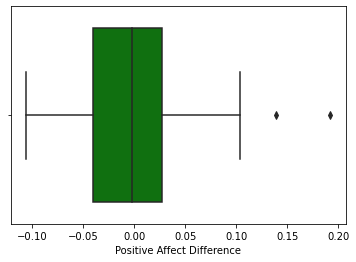

In [37]:
sns.boxplot(x=df1['Positive_Affect_Difference'], color='green')
plt.xlabel('Positive Affect Difference')
plt.savefig('PosAffect_Difference_Box.png', bbox_inches = 'tight')

In [38]:
df1 = df1.sort_values(by=['Positive_Affect_Difference'])
df1[['Country', 'Positive_Affect_Difference']]

,Country,Positive_Affect_Difference
51,Malta,-0.106
44,Kazakhstan,-0.103
16,China,-0.102
6,Belgium,-0.086
89,Uruguay,-0.082
...,...,...
50,Lithuania,0.094
54,Moldova,0.096
36,India,0.104
49,Latvia,0.139


In [39]:
z2 = np.abs(st.zscore(df1['Positive_Affect_Difference'])) # getting the z-score for all countries.
print(z2)

[2.00867453e+00 1.95015091e+00 1.93064304e+00 1.61851712e+00
 1.54048564e+00 1.32589906e+00 1.28688332e+00 1.28688332e+00
 1.15032823e+00 1.15032823e+00 1.11131249e+00 1.11131249e+00
 1.03328101e+00 9.94265265e-01 9.94265265e-01 9.55249524e-01
 9.16233783e-01 9.16233783e-01 8.38202301e-01 7.99186561e-01
 7.99186561e-01 7.40662949e-01 7.40662949e-01 7.21155079e-01
 7.01647209e-01 6.82139338e-01 5.65092116e-01 5.06568504e-01
 4.87060634e-01 4.67552764e-01 4.48044893e-01 4.09029152e-01
 3.89521282e-01 3.50505541e-01 2.91981930e-01 2.91981930e-01
 2.72474060e-01 2.33458319e-01 2.13950448e-01 1.94442578e-01
 1.55426837e-01 1.35918967e-01 9.69032258e-02 3.83796146e-02
 1.88717442e-02 6.36126209e-04 2.01439966e-02 2.01439966e-02
 3.96518670e-02 3.96518670e-02 5.91597374e-02 7.86676079e-02
 1.17683349e-01 1.76206960e-01 1.76206960e-01 1.95714830e-01
 2.34730571e-01 2.54238442e-01 2.73746312e-01 2.93254182e-01
 3.32269923e-01 3.71285664e-01 4.29809275e-01 4.29809275e-01
 4.49317146e-01 4.883328

In [40]:
threshold = 3
print(np.where(z2 > threshold)) #checking if there are any countries with a z-score > 3

(array([91], dtype=int64),)


In [41]:
df1.iloc[91]

Country                       Croatia
Happiness_2019                  5.626
Happiness_2020                  6.508
Happiness_Difference            0.882
Positive_Affect_2019            0.551
Positive_Affect_2020            0.743
Positive_Affect_Difference      0.192
Negative_Affect_2019            0.269
Negative_Affect_2020            0.286
Negative_Affect_Difference      0.017
Name: 18, dtype: object

Again there is one significant outlier - Croatia, where the score for positive emotions rose by 0.192 points.

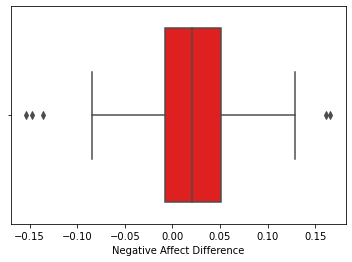

In [42]:
sns.boxplot(x=df1['Negative_Affect_Difference'], color='red')
plt.xlabel('Negative Affect Difference')
plt.savefig('Negative_Affect_Box.png', bbox_inches = 'tight')

In [43]:
df1 = df1.sort_values(by=['Negative_Affect_Difference'])
df1[['Country', 'Negative_Affect_Difference']]

,Country,Negative_Affect_Difference
57,Morocco,-0.154
33,Hong Kong S.A.R. of China,-0.148
7,Benin,-0.136
41,Ivory Coast,-0.085
36,India,-0.083
...,...,...
70,Serbia,0.116
81,Thailand,0.118
23,Egypt,0.129
66,Poland,0.161


In [44]:
z3 = np.abs(st.zscore(df1['Negative_Affect_Difference'])) # getting the z-score for all countries.
print(z3)

[3.13192757e+00 3.02464715e+00 2.81008630e+00 1.89820271e+00
 1.86244256e+00 1.70152193e+00 1.25452017e+00 1.03995932e+00
 1.03995932e+00 9.32678897e-01 8.43278544e-01 7.89638333e-01
 7.35998121e-01 7.35998121e-01 7.18118050e-01 6.82357909e-01
 6.82357909e-01 6.28717698e-01 5.75077486e-01 5.57197416e-01
 5.57197416e-01 5.57197416e-01 5.39317345e-01 5.21437275e-01
 5.21437275e-01 4.85677133e-01 4.85677133e-01 3.96276781e-01
 3.78396710e-01 3.60516640e-01 3.60516640e-01 3.24756499e-01
 3.24756499e-01 2.71116287e-01 2.71116287e-01 1.81715934e-01
 1.81715934e-01 1.63835864e-01 1.45955793e-01 1.28075723e-01
 9.23155816e-02 9.23155816e-02 7.44355110e-02 5.65554405e-02
 5.65554405e-02 2.07952994e-02 2.91522889e-03 2.91522889e-03
 2.91522889e-03 1.49648416e-02 1.49648416e-02 1.49648416e-02
 3.28449122e-02 3.28449122e-02 8.64851238e-02 1.22245265e-01
 1.93765547e-01 3.36806111e-01 3.36806111e-01 3.72566252e-01
 3.90446323e-01 4.26206464e-01 4.26206464e-01 4.44086535e-01
 4.44086535e-01 5.156068

In [45]:
threshold = 3
print(np.where(z3 > threshold)) #checking if there are any countries with a z-score > 3

(array([0, 1], dtype=int64),)


In [46]:
df1.iloc[0]

Country                       Morocco
Happiness_2019                  5.057
Happiness_2020                  4.803
Happiness_Difference           -0.254
Positive_Affect_2019            0.589
Positive_Affect_2020            0.587
Positive_Affect_Difference     -0.002
Negative_Affect_2019             0.41
Negative_Affect_2020            0.256
Negative_Affect_Difference     -0.154
Name: 57, dtype: object

In [47]:
df1.iloc[1]

Country                       Hong Kong S.A.R. of China
Happiness_2019                                    5.659
Happiness_2020                                    5.295
Happiness_Difference                             -0.364
Positive_Affect_2019                              0.599
Positive_Affect_2020                              0.609
Positive_Affect_Difference                         0.01
Negative_Affect_2019                              0.358
Negative_Affect_2020                               0.21
Negative_Affect_Difference                       -0.148
Name: 33, dtype: object

This time there are two significant outliers - Morocco and Hong Kong where the score for negative emotions decreased by 0.154 and 0.148 respectively.

We can see that all samples have at least two outliers. A z-score for each observation was obtained to check if any of these outliers are significant. The z-score is calculated by rescaling and centering the data so that the mean becomes zero. If an outlier has a z-score of > 3, this means it is more than three standard deviations away from the mean, and it is considered a significant outlier. 

After obtaining the z-scores for all observations, at least one significant outlier was identified for each sample. As somebody who is relatively new to statistical analysis, I'm not sure if these outliers should be deleted from the samples to prevent them from skewing the analysis. Or if they should be kept in as they may be representative of the 60+ countries for which we do not have 2019 and 2020 survey scores. 

Now let's look at the last assumption.


4.	**Differences between the two dependent variables follows an approximately normal distribution.** \
The first step to checking if a sample is normally distributed is to visualize the data using a chart such as a histogram and observe if the charts are generally bell-shaped. 


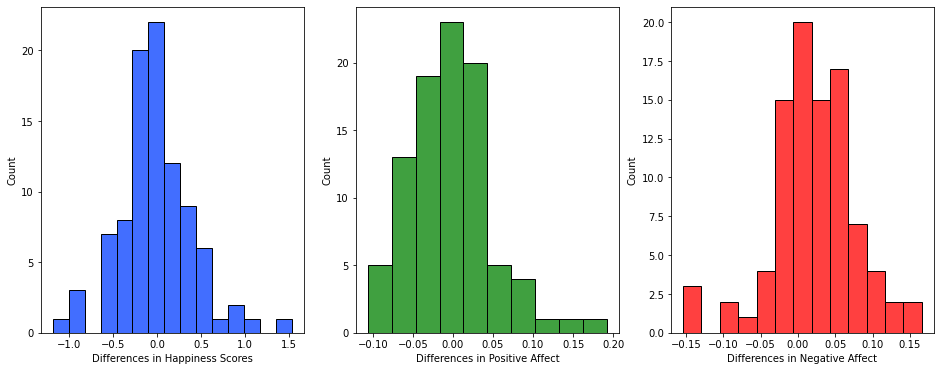

In [48]:
plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)
sns.histplot(df['Happiness_Difference'])
plt.xlabel("Differences in Happiness Scores")
plt.savefig("Happiness_Difference.png", bbox_inches = 'tight')

plt.subplot(1, 3, 2)
sns.histplot(df1['Positive_Affect_Difference'], color='green')
plt.xlabel("Differences in Positive Affect")
plt.savefig("PosAffect_Difference.png", bbox_inches = 'tight')

plt.subplot(1, 3, 3)
sns.histplot(df1['Negative_Affect_Difference'], color='red')
plt.xlabel("Differences in Negative Affect")
plt.savefig("NegAffect_Difference.png", bbox_inches = 'tight')

While the graphs look somewhat bell-shaped, there also seems to be a high level of kurtosis in each sample (probably due to the outliers that were already identified), and the graphs for differences in positive affect and negative affect seem to be a bit skewed.

For each sample, we will use the Shapiro-Wilk test to test the following null hypothesis: the distribution appears to be a Gaussian distribution (normal distribution).

In [49]:
stat, p = shapiro(df['Happiness_Difference'])
print(f"W-statistic = {stat}, p-value = {p}")
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

W-statistic = 0.9630268216133118, p-value = 0.009839926846325397
Sample does not look Gaussian (reject H0)


In [50]:
stat, p = shapiro(df1['Positive_Affect_Difference'])
print(f"W-statistic = {stat}, p-value = {p}")
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

W-statistic = 0.9623359441757202, p-value = 0.009334496222436428
Sample does not look Gaussian (reject H0)


In [51]:
stat, p = shapiro(df1['Negative_Affect_Difference'])
print(f"W-statistic = {stat}, p-value = {p}")
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

W-statistic = 0.9566745162010193, p-value = 0.0038919488433748484
Sample does not look Gaussian (reject H0)


From the results above, we can reject the null hypotheses, as none of these samples seem to be normally distributed.

While the sample sizes are big enough (>30) to assume normality despite the above results, the samples also have significant outliers, and it may cause the data to be biased if we omit these outliers.

Therefore, rather than using a parametric test such as the paired T-test to compare means, the Wilcoxon sign-ranked test wil be used instead. This non-parametric test determines whether two dependent samples were selected from populations having the same distribution.


### Hypothesis Testing - Wilcoxon Signed-Rank Test

**Hypothesis 1:**
   - Null Hypothesis: **Average happiness scores have stayed the same or increased from 2019 to 2020.**
   - Alternative Hypothesis: **Average happiness scores have decreased from 2019 to 2020.**
        

In [52]:
df[['Happiness_2019','Happiness_2020', 'Happiness_Difference']].describe()

,Happiness_2019,Happiness_2020,Happiness_Difference
count,93.000000,93.000000,93.000000
mean,5.848720,5.840591,-0.008129
std,1.076551,0.976857,0.423688
min,2.694000,3.160000,-1.188000
25%,5.035000,5.241000,-0.203000
50%,6.000000,5.885000,-0.003000
75%,6.561000,6.488000,0.210000
max,7.780000,7.889000,1.531000


In [53]:
w, p = wilcoxon(x=df['Happiness_2020'],y=df['Happiness_2019'], alternative='less')
print(f"The statistic is {w} and the p-value is {round(p, 6)}")
if p < 0.05:
    print('Reject null hypothesis')
else:
    print("Do not reject null hypothesis")

The statistic is 2045.0 and the p-value is 0.29517
Do not reject null hypothesis


**Hypothesis 2:**
   - Null Hypothesis: **Average positive affect scores have stayed the same or increased from 2019 to 2020.**
   - Alternative Hypothesis: **Average positive affect scores have decreased from 2019 to 2020.**

In [54]:
df1[['Positive_Affect_2019','Positive_Affect_2020','Positive_Affect_Difference']].describe()

,Positive_Affect_2019,Positive_Affect_2020,Positive_Affect_Difference
count,92.000000,92.000000,92.000000
mean,0.723076,0.720043,-0.003033
std,0.098718,0.084259,0.051542
min,0.422000,0.384000,-0.106000
25%,0.662000,0.657000,-0.040250
50%,0.743000,0.734500,-0.002500
75%,0.801750,0.787500,0.027250
max,0.891000,0.878000,0.192000


In [55]:
w, p = wilcoxon(x=df1['Positive_Affect_2020'],y=df1['Positive_Affect_2019'], alternative='less')
print(f"The statistic is {w} and the p-value is {round(p, 6)}")
if p < 0.05:
    print('Reject null hypothesis')
else:
    print("Do not reject null hypothesis")

The statistic is 1825.0 and the p-value is 0.144404
Do not reject null hypothesis


**Hypothesis 3:**
   - Null Hypothesis: **Average negative affect scores have stayed the same or decreased from 2019 to 2020.**
   - Alternative Hypothesis: **Average negative affect scores have increased from 2019 to 2020.**

In [56]:
df1[['Negative_Affect_2019','Negative_Affect_2020','Negative_Affect_Difference']].describe()

,Negative_Affect_2019,Negative_Affect_2020,Negative_Affect_Difference
count,92.000000,92.000000,92.000000
mean,0.268489,0.289652,0.021163
std,0.080553,0.076708,0.056235
min,0.093000,0.083000,-0.154000
25%,0.206500,0.237750,-0.008250
50%,0.252000,0.290500,0.020500
75%,0.319750,0.340000,0.051250
max,0.466000,0.470000,0.166000


In [57]:
w, p = wilcoxon(x=df1['Negative_Affect_2020'],y=df1['Negative_Affect_2019'], alternative='greater')
print(f"The statistic is {w} and the p-value is {round(p, 6)}")
if p < 0.05:
    print('Reject null hypothesis')
else:
    print("Do not reject null hypothesis")

The statistic is 3135.5 and the p-value is 1.8e-05
Reject null hypothesis


### Results

The Wilcoxon sign-ranked test (one-tailed) was used to analyze scores for happiness, positive emotions, and negative emotions to test if there are significant differences between the 2020 sample and the 2019 sample. 

The results show that the mean happiness score of the 2020 sample (5.841 ± 0.977) was slightly lower than the mean happiness for 2019 (5.849 ± 1.077), but there was not a statistically significant decrease in happiness scores (p = 0.295). 

The mean of positive affect scores in 2020 (0.720 ± 0.084) was also slightly lower than the mean for the 2019 sample (0.723 ± 0.099), but again the difference was insignificant (p = 0.144). 

Lastly, the average negative affect score was lower in 2019 (0.268 ± 0.081) compared to 2020 (0.290 ± 0.077), and the hypothesis testing showed that there was a significant increase in negative emotions (p = 1.84E-05). Thus, there is evidence to suggest that COVID-19 may have had an effect on people’s wellbeing by increasing their negative emotions. 


### Conclusion
It is not surprising that negative emotions like sadness, worry and anger increased in 2020 compared to the previous year, considering all the hardships COVID-19 has introduced into our lives. However, countries in the 2020 sample still demonstrated remarkable resilience, with positive emotions and life evaluations showing no significant change. 

That said, the scope of this project was quite limited, especially as there were many countries missing from the 2020 sample. A lot of the missing countries are low-income countries in regions such as Africa, and many of these countries have reported lower-than-average life satisfaction scores in previous reports. Therefore, the next World Happiness Report must survey a much wider scope of countries to really capture the pandemic’s impact on the world’s happiness and wellbeing. 

### References
•	Brodeur, A., Clark, A. E., Fleche, S., & Powdthavee, N. (2020). Assessing the impact of the coronavirus lockdown on unhappiness, loneliness, and boredom using Google Trends. arXiv preprint arXiv:2004.12129. 

•	Geirdal, A. Ø., Ruffolo, M., Leung, J., Thygesen, H., Price, D., Bonsaksen, T., & Schoultz, M. (2021). Mental health, quality of life, wellbeing, loneliness and use of social media in a time of social distancing during the COVID-19 outbreak. A cross-country comparative study. Journal of Mental Health, 1-8. 

•	Greyling, T., Rossouw, S. and Adhikari, T., 2020. A tale of three countries: How did Covid-19 lockdown impact happiness? (No. 584). GLO Discussion Paper.

•	Helliwell, J.F., Layard, R., Sachs, J., and De Neve, J.E. eds. 2021. World Happiness Report 2021. New York: Sustainable Development Solutions Network.

•	Lwin, M.O., Lu, J., Sheldenkar, A., Schulz, P.J., Shin, W., Gupta, R. and Yang, Y., 2020. Global sentiments surrounding the COVID-19 pandemic on Twitter: analysis of Twitter trends. JMIR public health and surveillance, 6(2), p.e19447.

•	Zacher, H. and Rudolph, C.W., 2020. Individual differences and changes in subjective wellbeing during the early stages of the COVID-19 pandemic. American Psychologist.

